<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_1_0_9_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.937644,30.232326,79.510348,40.553069,-0.213342,237.020045,237.518103,-0.498058
1,0.0,1.0,91.690701,20.297324,51.858764,20.109581,0.371427,194.327796,194.165627,0.162169
2,0.0,2.0,55.707945,34.649364,65.949482,91.222073,0.135538,257.664402,257.598926,0.065476
3,0.0,3.0,71.776162,71.411310,53.300878,76.123576,0.447470,283.059396,282.635699,0.423697
4,0.0,4.0,79.162389,88.147955,35.363342,35.991221,-0.196310,248.468597,248.711530,-0.242933
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.535937,71.481489,21.847629,48.962437,1.601820,181.429313,179.888166,1.541146
119996,999.0,116.0,86.939316,65.252421,31.398525,25.031297,-0.318947,218.302613,218.678781,-0.376168
119997,999.0,117.0,67.303117,22.281905,94.342577,50.605540,-0.490557,244.042583,244.564206,-0.521623
119998,999.0,118.0,30.675675,23.998655,90.938444,22.228917,0.054066,177.895758,177.848911,0.046847


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.937644  30.232326  79.510348  40.553069 -0.213342  237.020045   
      1.0    91.690701  20.297324  51.858764  20.109581  0.371427  194.327796   
      2.0    55.707945  34.649364  65.949482  91.222073  0.135538  257.664402   
      3.0    71.776162  71.411310  53.300878  76.123576  0.447470  283.059396   
      4.0    79.162389  88.147955  35.363342  35.991221 -0.196310  248.468597   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  27.535937  71.481489  21.847629  48.962437  1.601820  181.429313   
      116.0  86.939316  65.252421  31.398525  25.031297 -0.318947  218.302613   
      117.0  67.303117  22.281905  94.342577  50.605540 -0.490557  244.042583   
      118.0  30.675675  23.998655  90.938444  22.228917  0.054066  177.895758   
      119.0  37.511192  74.629695  82.769580  81.344982 -0.672055  285.583394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.518103 -0.498058  
      1.0    194.165627  0.162169  
      2.0    257.598926  0.065476  
      3.0    282.635699  0.423697  
      4.0    248.711530 -0.242933  
...                 ...       ...  
999.0 115.0  179.888166  1.541146  
      116.0  218.678781 -0.376168  
      117.0  244.564206 -0.521623  
      118.0  177.848911  0.046847  
      119.0  286.186342 -0.602948  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.937644  30.232326  79.510348  40.553069 -0.213342  237.020045   
      1.0    91.690701  20.297324  51.858764  20.109581  0.371427  194.327796   
      2.0    55.707945  34.649364  65.949482  91.222073  0.135538  257.664402   
      3.0    71.776162  71.411310  53.300878  76.123576  0.447470  283.059396   
      4.0    79.162389  88.147955  35.363342  35.991221 -0.196310  248.468597   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  27.535937  71.481489  21.847629  48.962437  1.601820  181.429313   
      116.0  86.939316  65.252421  31.398525  25.031297 -0.318947  218.302613   
      117.0  67.303117  22.281905  94.342577  50.605540 -0.490557  244.042583   
      118.0  30.675675  23.998655  90.938444  22.228917  0.054066  177.895758   
      119.0  37.511192  74.629695  82.769580  81.344982 -0.672055  285.583394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.518103 -0.498058  
      1.0    194.165627  0.162169  
      2.0    257.598926  0.065476  
      3.0    282.635699  0.423697  
      4.0    248.711530 -0.242933  
...                 ...       ...  
999.0 115.0  179.888166  1.541146  
      116.0  218.678781 -0.376168  
      117.0  244.564206 -0.521623  
      118.0  177.848911  0.046847  
      119.0  286.186342 -0.602948  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.937644,30.232326,79.510348,40.553069,-0.213342,237.020045,237.518103,-0.498058
1,0.0,1.0,91.690701,20.297324,51.858764,20.109581,0.371427,194.327796,194.165627,0.162169
2,0.0,2.0,55.707945,34.649364,65.949482,91.222073,0.135538,257.664402,257.598926,0.065476
3,0.0,3.0,71.776162,71.411310,53.300878,76.123576,0.447470,283.059396,282.635699,0.423697
4,0.0,4.0,79.162389,88.147955,35.363342,35.991221,-0.196310,248.468597,248.711530,-0.242933
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.535937,71.481489,21.847629,48.962437,1.601820,181.429313,179.888166,1.541146
119996,999.0,116.0,86.939316,65.252421,31.398525,25.031297,-0.318947,218.302613,218.678781,-0.376168
119997,999.0,117.0,67.303117,22.281905,94.342577,50.605540,-0.490557,244.042583,244.564206,-0.521623
119998,999.0,118.0,30.675675,23.998655,90.938444,22.228917,0.054066,177.895758,177.848911,0.046847


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.937644  30.232326  79.510348  40.553069 -0.213342  237.020045   
      1.0    91.690701  20.297324  51.858764  20.109581  0.371427  194.327796   
      2.0    55.707945  34.649364  65.949482  91.222073  0.135538  257.664402   
      3.0    71.776162  71.411310  53.300878  76.123576  0.447470  283.059396   
      4.0    79.162389  88.147955  35.363342  35.991221 -0.196310  248.468597   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  27.535937  71.481489  21.847629  48.962437  1.601820  181.429313   
      116.0  86.939316  65.252421  31.398525  25.031297 -0.318947  218.302613   
      117.0  67.303117  22.281905  94.342577  50.605540 -0.490557  244.042583   
      118.0  30.675675  23.998655  90.938444  22.228917  0.054066  177.895758   
      119.0  37.511192  74.629695  82.769580  81.344982 -0.672055  285.583394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.518103 -0.498058  
      1.0    194.165627  0.162169  
      2.0    257.598926  0.065476  
      3.0    282.635699  0.423697  
      4.0    248.711530 -0.242933  
...                 ...       ...  
999.0 115.0  179.888166  1.541146  
      116.0  218.678781 -0.376168  
      117.0  244.564206 -0.521623  
      118.0  177.848911  0.046847  
      119.0  286.186342 -0.602948  

[120000 rows x 8 columns]

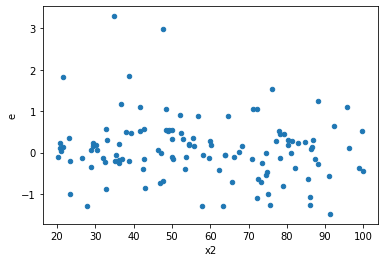

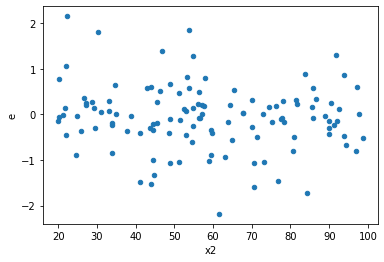

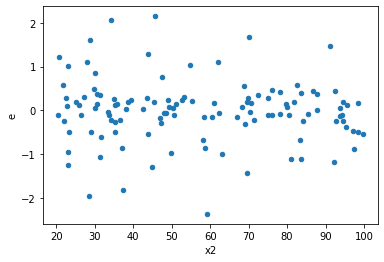

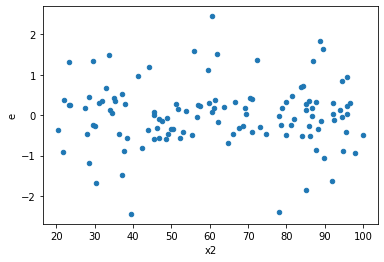

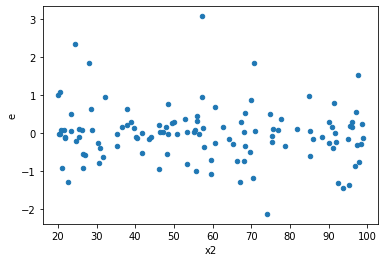

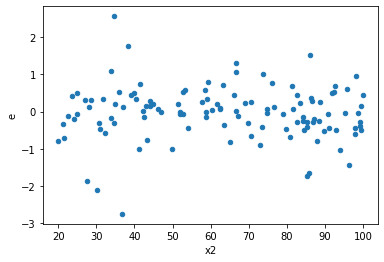

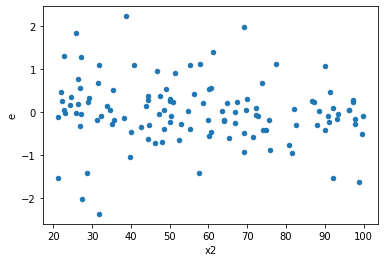

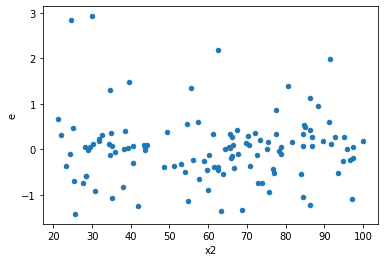

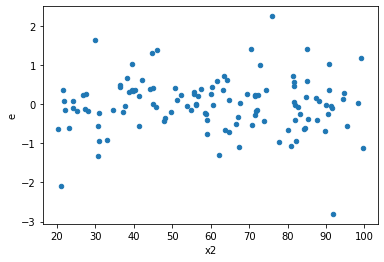

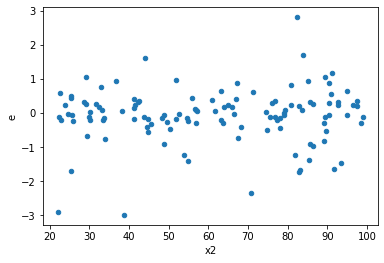

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,65.0,47.0,27.81750442332462,21.215307361582234,0.4279616065126865,0.4513895183315369,1.0547430224167922,0.8562845130081771,0.5718577434959115,0.42814225650408855,Reject005=1 : Homoscedasticity
2.0,66.0,46.0,20.897998494196877,15.963689009026144,0.3166363408211648,0.34703671758752486,1.0960103843024451,0.7498750325102739,0.6250624837448631,0.37493751625513694,Reject005=1 : Homoscedasticity
3.0,50.0,62.0,20.84695349843671,26.068847929374733,0.41693906996873425,0.42046528918346343,1.0084573969405017,0.9674392076754934,0.5162803961622533,0.4837196038377467,Reject005=1 : Homoscedasticity
6.0,51.0,61.0,19.630161511593112,39.404034841370155,0.3849051276782963,0.6459677842847567,1.6782519582972573,0.053231390210489726,0.9733843048947551,0.026615695105244863,Reject005=1 : Homoscedasticity
7.0,66.0,46.0,29.956799924294966,26.521186922790623,0.4538909079438631,0.5765475417997962,1.2702337317386916,0.3935098078415593,0.8032450960792203,0.19675490392077966,Reject005=1 : Homoscedasticity
8.0,53.0,59.0,27.28166151775547,39.412521204462145,0.5147483305236881,0.6680088339739346,1.297738709116986,0.32951050531515347,0.8352447473424233,0.16475525265757673,Reject005=1 : Homoscedasticity
11.0,58.0,54.0,25.278772307631023,28.61932530819023,0.4358409018557073,0.5299875057072265,1.2160114010655385,0.4694078419873777,0.7652960790063111,0.23470392099368886,Reject005=1 : Homoscedasticity
15.0,56.0,56.0,25.745526367261846,28.980801073849623,0.45974154227253294,0.5175143048901718,1.1256635681258307,0.6593510711797244,0.6703244644101378,0.3296755355898622,Reject005=1 : Homoscedasticity
16.0,50.0,62.0,21.03000579628025,32.443393467285944,0.420600115925605,0.5232805397949346,1.2441283774812169,0.41167267081167025,0.7941636645941649,0.20583633540583512,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,65.0,47.0,27.81750442332462,21.215307361582234,0.4279616065126865,0.4513895183315369,1.0547430224167922,0.8562845130081771,Reject005=1 : Homoscedasticity
1.0,65.0,47.0,28.238480278016944,12.893162357299403,0.4344381581233376,0.2743226033467958,0.6314422391711624,0.08573932366540725,Reject005=1 : Homoscedasticity
2.0,66.0,46.0,20.897998494196877,15.963689009026144,0.3166363408211648,0.34703671758752486,1.0960103843024451,0.7498750325102739,Reject005=1 : Homoscedasticity
3.0,50.0,62.0,20.84695349843671,26.068847929374733,0.41693906996873425,0.42046528918346343,1.0084573969405017,0.9674392076754934,Reject005=1 : Homoscedasticity
4.0,56.0,56.0,36.31329316749347,23.350850554705367,0.6484516637052405,0.41697947419116727,0.643038637311152,0.10138142182421786,Reject005=1 : Homoscedasticity
5.0,67.0,45.0,32.19747396183932,19.79659802494968,0.48055931286327347,0.4399244005544374,0.9154424621037417,0.7327752206421897,Reject005=1 : Homoscedasticity
6.0,51.0,61.0,19.630161511593112,39.404034841370155,0.3849051276782963,0.6459677842847567,1.6782519582972573,0.053231390210489726,Reject005=1 : Homoscedasticity
7.0,66.0,46.0,29.956799924294966,26.521186922790623,0.4538909079438631,0.5765475417997962,1.2702337317386916,0.3935098078415593,Reject005=1 : Homoscedasticity
8.0,53.0,59.0,27.28166151775547,39.412521204462145,0.5147483305236881,0.6680088339739346,1.297738709116986,0.32951050531515347,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      838
Reject005=0 : Heteroscedasticity    162
Name: Result_test, dtype: int64